## Data exploration and transformation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Data Split

In [19]:
train_data = pd.read_csv('../input/train.csv')
test_data = pd.read_csv('../input/test.csv')

# feature Engineering

In [20]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [21]:
train_data['Title'] = train_data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
test_data['Title'] = test_data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [22]:
print(train_data['Title'].unique())
print(test_data['Title'].unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer']
['Mr' 'Mrs' 'Miss' 'Master' 'Ms' 'Col' 'Rev' 'Dr' 'Dona']


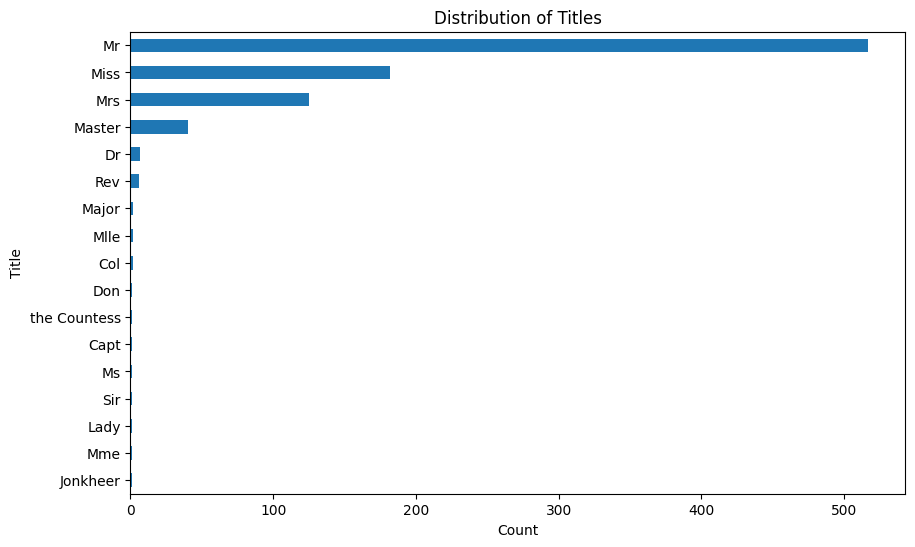

In [23]:
plt.figure(figsize=(10, 6))
train_data['Title'].value_counts().sort_values().plot(kind='barh')
plt.title('Distribution of Titles')
plt.xlabel('Count')
plt.ylabel('Title')
plt.show()

Title
Capt            0.000000
Col             0.500000
Don             0.000000
Dr              0.428571
Jonkheer        0.000000
Lady            1.000000
Major           0.500000
Master          0.575000
Miss            0.697802
Mlle            1.000000
Mme             1.000000
Mr              0.156673
Mrs             0.792000
Ms              1.000000
Rev             0.000000
Sir             1.000000
the Countess    1.000000
Name: Survived, dtype: float64


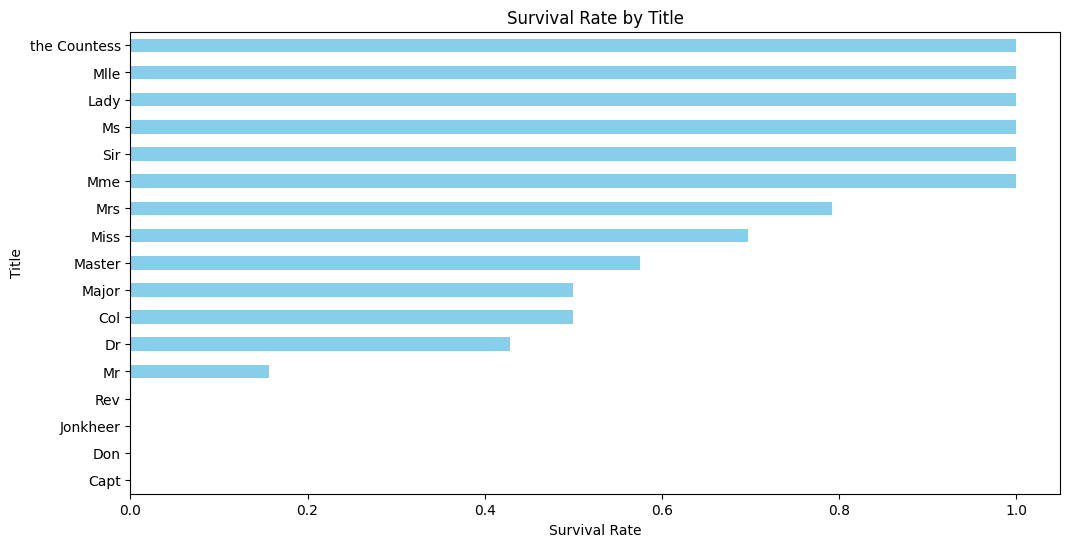

In [24]:
title_survival_rate = train_data.groupby('Title')['Survived'].mean()

print(title_survival_rate)

plt.figure(figsize=(12, 6))
title_survival_rate.sort_values().plot(kind='barh', color='skyblue')
plt.title('Survival Rate by Title')
plt.xlabel('Survival Rate')
plt.ylabel('Title')
plt.show()

In [25]:
def get_titles(title):
    if title in ['Mme', 'Ms', 'Lady', 'Dona']:
        return 'Mrs'
    elif title in ['Mlle', 'the Countess']:
        return 'Miss'
    elif title in ['Capt', 'Col', 'Major', 'Dr', 'Rev', 'Jonkheer', 'Don', 'Sir','Master']:
        return 'Rare'
    else:
        return title

In [26]:
train_data['Title'] = train_data['Title'].apply(get_titles)
test_data['Title'] = test_data['Title'].apply(get_titles)

In [27]:
train_data['Age'] = pd.to_numeric(train_data['Age'], errors='coerce')
test_data['Age'] = pd.to_numeric(test_data['Age'], errors='coerce')
train_data.loc[train_data['Age'] < 0, 'Age'] = float('nan')
test_data.loc[train_data['Age'] < 0, 'Age'] = float('nan')

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_distribution(col_x,key):
 sns.kdeplot(data=train_data[train_data[key] == 1], x=col_x, label='Survived', color='green', fill=True)
 sns.kdeplot(data=train_data[train_data[key] == 0], x=col_x, label='Not Survived', color='red', fill=True)

 plt.xlabel(col_x)
 plt.ylabel('Density')
 plt.title(f'Density Plot of {col_x} by {key}')
 plt.legend()

 plt.show()

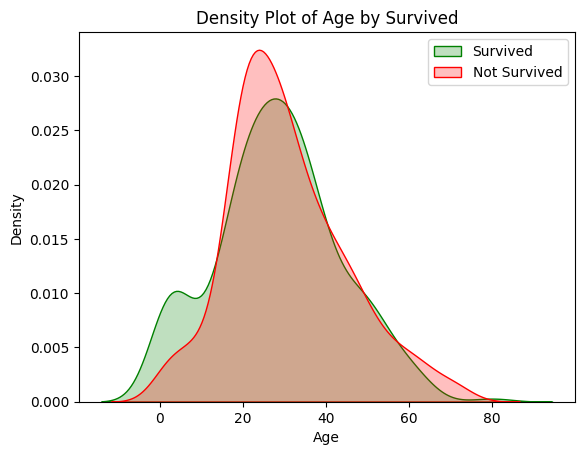

In [29]:
plot_distribution('Age','Survived')

In [30]:
title_age_median_train = train_data.groupby('Title')['Age'].median()
title_age_median_test = test_data.groupby('Title')['Age'].median()

In [31]:
train_data['Age'] = train_data.apply(
    lambda row: title_age_median_train[row['Title']] if pd.isnull(row['Age']) else row['Age'], axis=1
)

test_data['Age'] = test_data.apply(
    lambda row: title_age_median_test[row['Title']] if pd.isnull(row['Age']) else row['Age'], axis=1
)


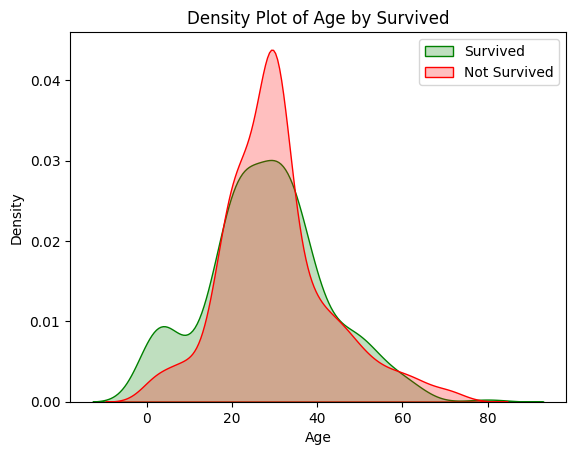

In [32]:
plot_distribution('Age','Survived')

In [33]:
print(train_data.columns)
print(test_data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title'],
      dtype='object')


In [34]:
train_data.drop('Name', axis=1, inplace=True)
test_data.drop('Name', axis=1, inplace=True)

In [35]:
bins_age = [0, 16,20,30,40,60,100] 
labels_age = ['0-16','16-20','20-30','30-40', '40-60','60-100']
train_data['Age_Category'] = pd.cut(train_data['Age'], bins=bins_age, labels=labels_age, right=True)
test_data['Age_Category'] = pd.cut(test_data['Age'], bins=bins_age, labels=labels_age, right=True)

In [36]:
age_survival_rate = train_data.groupby('Age_Category')['Survived'].mean()

print(age_survival_rate)


Age_Category
0-16      0.542857
16-20     0.341772
20-30     0.311688
30-40     0.482558
40-60     0.390625
60-100    0.227273
Name: Survived, dtype: float64


In [37]:
train_data = pd.get_dummies(train_data, columns=['Age_Category'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['Age_Category'], drop_first=True)

In [38]:
test_data['Fare'].fillna(test_data['Fare'].mean(), inplace=True)

In [39]:
test_data['Fare'].dtype

dtype('float64')

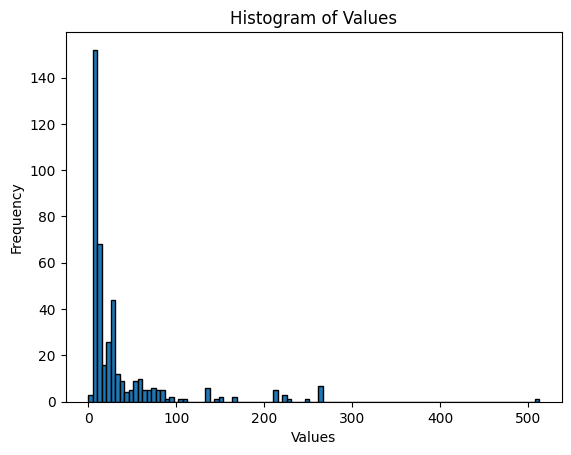

In [40]:
test_data['Fare'].plot(kind='hist', bins=100, edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Values')
plt.show()

In [41]:
bins_fare = [0, 10,50, 100, 200,600]
labels_fare = ['0-10','10-50', '50-100','100-200','200+']

train_data['Fare_bin'] = pd.cut(train_data['Fare'], bins=bins_fare, labels=labels_fare, right=False)
test_data['Fare_bin'] = pd.cut(train_data['Fare'], bins=bins_fare, labels=labels_fare, right=False)


Fare_bin
0-10       0.199405
10-50      0.421320
50-100     0.648148
100-200    0.757576
200+       0.700000
Name: Survived, dtype: float64


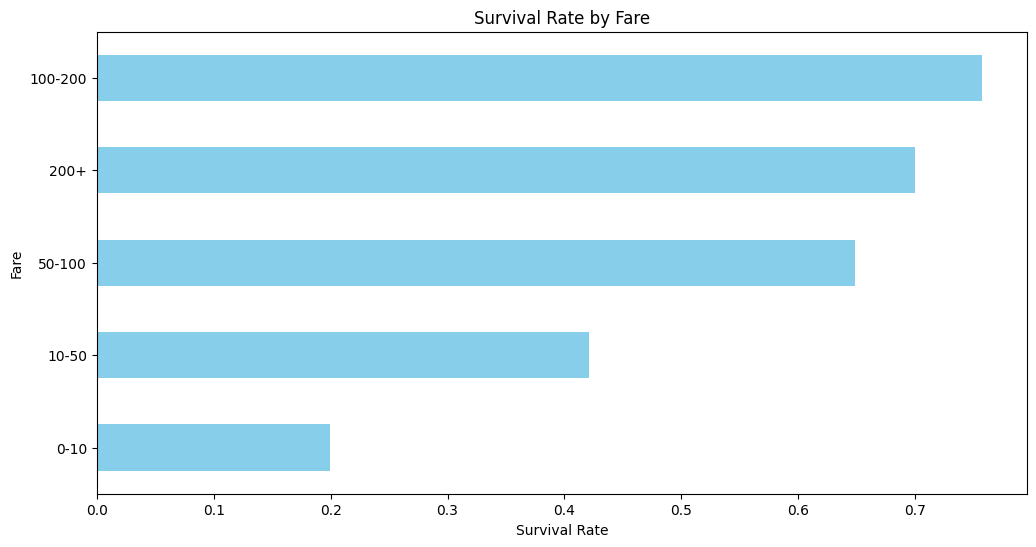

In [42]:
fare_survival_rate = train_data.groupby('Fare_bin')['Survived'].mean()

print(fare_survival_rate)

plt.figure(figsize=(12, 6))
fare_survival_rate.sort_values().plot(kind='barh', color='skyblue')
plt.title('Survival Rate by Fare')
plt.xlabel('Survival Rate')
plt.ylabel('Fare')
plt.show()

In [43]:
train_data = pd.get_dummies(train_data, columns=['Fare_bin'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['Fare_bin'], drop_first=True)

In [44]:
print(test_data.info())
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PassengerId          418 non-null    int64  
 1   Pclass               418 non-null    int64  
 2   Sex                  418 non-null    object 
 3   Age                  418 non-null    float64
 4   SibSp                418 non-null    int64  
 5   Parch                418 non-null    int64  
 6   Ticket               418 non-null    object 
 7   Fare                 418 non-null    float64
 8   Cabin                91 non-null     object 
 9   Embarked             418 non-null    object 
 10  Title                418 non-null    object 
 11  Age_Category_16-20   418 non-null    uint8  
 12  Age_Category_20-30   418 non-null    uint8  
 13  Age_Category_30-40   418 non-null    uint8  
 14  Age_Category_40-60   418 non-null    uint8  
 15  Age_Category_60-100  418 non-null    uin

In [45]:
train_data['Cabin_ind'] = train_data['Cabin'].apply(lambda x: 0 if pd.isna(x) else 1)
test_data['Cabin_ind'] = test_data['Cabin'].apply(lambda x: 0 if pd.isna(x) else 1)

In [46]:
train_data['Deck'] = train_data['Cabin'].apply(lambda x: str(x)[0] if pd.notna(x) else 'M')  # 'M' for Missing
test_data['Deck'] = test_data['Cabin'].apply(lambda x: str(x)[0] if pd.notna(x) else 'M')

In [47]:
train_data.drop('Cabin', axis=1, inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)
print(test_data.info())
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PassengerId          418 non-null    int64  
 1   Pclass               418 non-null    int64  
 2   Sex                  418 non-null    object 
 3   Age                  418 non-null    float64
 4   SibSp                418 non-null    int64  
 5   Parch                418 non-null    int64  
 6   Ticket               418 non-null    object 
 7   Fare                 418 non-null    float64
 8   Embarked             418 non-null    object 
 9   Title                418 non-null    object 
 10  Age_Category_16-20   418 non-null    uint8  
 11  Age_Category_20-30   418 non-null    uint8  
 12  Age_Category_30-40   418 non-null    uint8  
 13  Age_Category_40-60   418 non-null    uint8  
 14  Age_Category_60-100  418 non-null    uint8  
 15  Fare_bin_10-50       418 non-null    uin

In [48]:
most_frequent_embarked = train_data['Embarked'].mode()[0]
train_data['Embarked'].fillna(most_frequent_embarked, inplace=True)

In [ ]:
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked', 'Deck'], drop_first=True, 
                            prefix={'Sex': 'Sex', 'Embarked': 'Embarked', 'Deck': 'Deck'})
test_data = pd.get_dummies(test_data, columns=['Sex', 'Embarked', 'Deck'], drop_first=True, 
                           prefix={'Sex': 'Sex', 'Embarked': 'Embarked', 'Deck': 'Deck'})

In [49]:
train_data = pd.get_dummies(train_data, columns=['Pclass'], drop_first=True)

In [50]:
test_data = pd.get_dummies(test_data, columns=['Pclass'], drop_first=True)

In [51]:
print(test_data.info())
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PassengerId          418 non-null    int64  
 1   Age                  418 non-null    float64
 2   SibSp                418 non-null    int64  
 3   Parch                418 non-null    int64  
 4   Ticket               418 non-null    object 
 5   Fare                 418 non-null    float64
 6   Title                418 non-null    object 
 7   Age_Category_16-20   418 non-null    uint8  
 8   Age_Category_20-30   418 non-null    uint8  
 9   Age_Category_30-40   418 non-null    uint8  
 10  Age_Category_40-60   418 non-null    uint8  
 11  Age_Category_60-100  418 non-null    uint8  
 12  Fare_bin_10-50       418 non-null    uint8  
 13  Fare_bin_50-100      418 non-null    uint8  
 14  Fare_bin_100-200     418 non-null    uint8  
 15  Fare_bin_200+        418 non-null    uin

## Family and connection

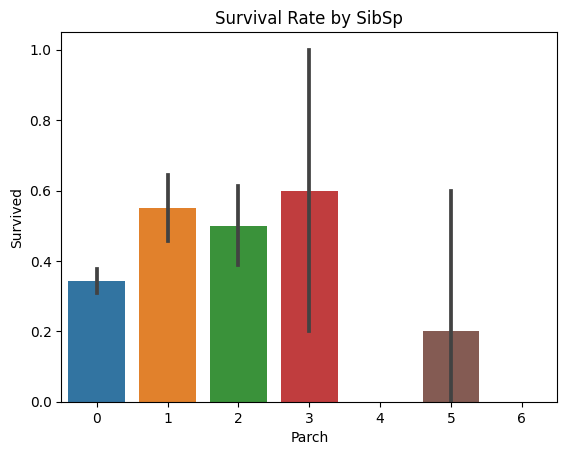

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot survival rate by SibSp
sns.barplot(x='Parch', y='Survived', data=train_data)
plt.title('Survival Rate by SibSp')
plt.show()

In [53]:
train_data['Family_size'] = train_data['SibSp'] + train_data['Parch'] 
test_data['Family_size'] = test_data['SibSp'] + test_data['Parch']

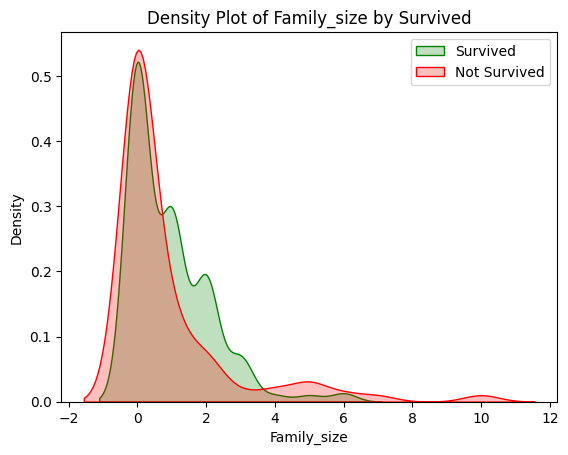

In [54]:
plot_distribution('Family_size','Survived')

In [55]:
bins_Familysize = [0,1,3,5,15]
labels_Familysize = ['solo', 'Small','Medium','Large']

train_data['Familysize_Group'] = pd.cut(train_data['Family_size'], bins=bins_Familysize, labels=labels_Familysize , right=False)
test_data['Familysize_Group'] = pd.cut(train_data['Family_size'], bins=bins_Familysize, labels=labels_Familysize , right=False)


In [56]:
total_passengers = train_data.shape[0]
survived_passengers = train_data['Survived'].sum()  # Sum of 1s in 'Survived' column
survival_rate = survived_passengers / total_passengers
print(survival_rate)

0.3838383838383838


In [57]:
train_data['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [58]:
combined_data = pd.concat([train_data, test_data], axis=0, ignore_index=True)

combined_data['Is_Duplicate_Ticket'] = combined_data.duplicated(subset=['Ticket'], keep=False)

combined_data['Connected_Survival'] = 0.38

for ticket, df_grp in combined_data.groupby('Ticket'):
    if len(df_grp) > 1:  # Only consider tickets with more than one passenger
        smax = df_grp['Survived'].max()
        smin = df_grp['Survived'].min()
        for ind, row in df_grp.iterrows():
            passID = row['PassengerId']
            if smax == 1.0:
                combined_data.loc[combined_data['PassengerId'] == passID, 'Connected_Survival'] = 1
            elif smin == 0.0:
                combined_data.loc[combined_data['PassengerId'] == passID, 'Connected_Survival'] = 0

print('People with duplicate tickets: %.0f' % combined_data['Is_Duplicate_Ticket'].sum())
print("People with connected survival information: %.0f" % 
      (combined_data[combined_data['Connected_Survival'] != 0.5].shape[0]))

print(combined_data.groupby('Connected_Survival')['Survived'].mean().round(3))

print(combined_data[['Ticket', 'Connected_Survival']].head())
    

People with duplicate tickets: 596
People with connected survival information: 1309
Connected_Survival
0.00    0.000
0.38    0.270
1.00    0.794
Name: Survived, dtype: float64
             Ticket  Connected_Survival
0         A/5 21171                0.38
1          PC 17599                1.00
2  STON/O2. 3101282                0.38
3            113803                1.00
4            373450                0.38


In [59]:
combined_data.head()

,PassengerId,Survived,Age,SibSp,Parch,Ticket,Fare,Title,Age_Category_16-20,Age_Category_20-30,...,Deck_F,Deck_G,Deck_M,Deck_T,Pclass_2,Pclass_3,Family_size,Familysize_Group,Is_Duplicate_Ticket,Connected_Survival
0,1,0.0,22.0,1,0,A/5 21171,7.2500,Mr,0,1,...,0,0,1,0.0,0,1,1,Small,False,0.38
1,2,1.0,38.0,1,0,PC 17599,71.2833,Mrs,0,0,...,0,0,0,0.0,0,0,1,Small,True,1.00
2,3,1.0,26.0,0,0,STON/O2. 3101282,7.9250,Miss,0,1,...,0,0,1,0.0,0,1,0,solo,False,0.38
3,4,1.0,35.0,1,0,113803,53.1000,Mrs,0,0,...,0,0,0,0.0,0,0,1,Small,True,1.00
4,5,0.0,35.0,0,0,373450,8.0500,Mr,0,0,...,0,0,1,0.0,0,1,0,solo,False,0.38


In [60]:
train_data['Connected_Survival'] = combined_data['Connected_Survival'].iloc[:len(train_data)]
test_data['Connected_Survival'] = combined_data['Connected_Survival'].iloc[len(train_data):].reset_index(drop=True)

In [61]:
test_data.head()

,PassengerId,Age,SibSp,Parch,Ticket,Fare,Title,Age_Category_16-20,Age_Category_20-30,Age_Category_30-40,...,Deck_D,Deck_E,Deck_F,Deck_G,Deck_M,Pclass_2,Pclass_3,Family_size,Familysize_Group,Connected_Survival
0,892,34.5,0,0,330911,7.8292,Mr,0,0,1,...,0,0,0,0,1,0,1,0,Small,0.38
1,893,47.0,1,0,363272,7.0000,Mrs,0,0,0,...,0,0,0,0,1,0,1,1,Small,0.38
2,894,62.0,0,0,240276,9.6875,Mr,0,0,0,...,0,0,0,0,1,1,0,0,solo,0.38
3,895,27.0,0,0,315154,8.6625,Mr,0,1,0,...,0,0,0,0,1,0,1,0,Small,0.38
4,896,22.0,1,1,3101298,12.2875,Mrs,0,1,0,...,0,0,0,0,1,0,1,2,solo,1.00


In [62]:
train_data = pd.get_dummies(train_data, columns=['Familysize_Group'], drop_first=True)

In [63]:
test_data = pd.get_dummies(test_data, columns=['Familysize_Group'], drop_first=True)

In [64]:
def is_mother(row):
    return row['Title'] == 'Mrs' and row['Parch'] > 0

# Apply the function to create the 'Is_Mother' column
train_data['Is_Mother'] = train_data.apply(is_mother, axis=1).astype(int)
test_data['Is_Mother'] = test_data.apply(is_mother, axis=1).astype(int)


In [65]:
train_data.drop('Family_size', axis=1, inplace=True)
test_data.drop('Family_size', axis=1, inplace=True)

In [66]:
train_data.drop('Ticket', axis=1, inplace=True)
test_data.drop('Ticket', axis=1, inplace=True)

In [67]:
train_data.drop('Fare', axis=1, inplace=True)
test_data.drop('Fare', axis=1, inplace=True)

In [68]:
train_data.drop('Age', axis=1, inplace=True)
test_data.drop('Age', axis=1, inplace=True)

In [69]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PassengerId              418 non-null    int64  
 1   SibSp                    418 non-null    int64  
 2   Parch                    418 non-null    int64  
 3   Title                    418 non-null    object 
 4   Age_Category_16-20       418 non-null    uint8  
 5   Age_Category_20-30       418 non-null    uint8  
 6   Age_Category_30-40       418 non-null    uint8  
 7   Age_Category_40-60       418 non-null    uint8  
 8   Age_Category_60-100      418 non-null    uint8  
 9   Fare_bin_10-50           418 non-null    uint8  
 10  Fare_bin_50-100          418 non-null    uint8  
 11  Fare_bin_100-200         418 non-null    uint8  
 12  Fare_bin_200+            418 non-null    uint8  
 13  Cabin_ind                418 non-null    int64  
 14  Sex_male                 4

In [71]:
train_data = pd.get_dummies(train_data, columns=['Title'], prefix='Title')
test_data = pd.get_dummies(test_data, columns=['Title'], prefix='Title')

In [72]:
X_train = train_data.drop(['Survived', 'PassengerId'], axis=1)
X_test = test_data.drop(['PassengerId'], axis=1)

In [73]:
X_train = train_data.drop(['Survived', 'PassengerId'], axis=1)

In [74]:
X_train_Base = X_train.drop(columns=['Connected_Survival'])

In [75]:
y_train = train_data['Survived']

In [76]:
X_test = test_data.drop(['PassengerId'], axis=1)

In [77]:
train_columns = set(X_train.columns)
test_columns = set(X_test.columns)

In [78]:
missing_cols_test = train_columns - test_columns

In [79]:
missing_cols_test

{'Deck_T'}

In [80]:
for col in missing_cols_test:
    X_test[col] = 0

In [81]:
X_test = X_test[X_train.columns]

In [82]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SibSp                    418 non-null    int64  
 1   Parch                    418 non-null    int64  
 2   Age_Category_16-20       418 non-null    uint8  
 3   Age_Category_20-30       418 non-null    uint8  
 4   Age_Category_30-40       418 non-null    uint8  
 5   Age_Category_40-60       418 non-null    uint8  
 6   Age_Category_60-100      418 non-null    uint8  
 7   Fare_bin_10-50           418 non-null    uint8  
 8   Fare_bin_50-100          418 non-null    uint8  
 9   Fare_bin_100-200         418 non-null    uint8  
 10  Fare_bin_200+            418 non-null    uint8  
 11  Cabin_ind                418 non-null    int64  
 12  Sex_male                 418 non-null    uint8  
 13  Embarked_Q               418 non-null    uint8  
 14  Embarked_S               4

In [83]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SibSp                    891 non-null    int64  
 1   Parch                    891 non-null    int64  
 2   Age_Category_16-20       891 non-null    uint8  
 3   Age_Category_20-30       891 non-null    uint8  
 4   Age_Category_30-40       891 non-null    uint8  
 5   Age_Category_40-60       891 non-null    uint8  
 6   Age_Category_60-100      891 non-null    uint8  
 7   Fare_bin_10-50           891 non-null    uint8  
 8   Fare_bin_50-100          891 non-null    uint8  
 9   Fare_bin_100-200         891 non-null    uint8  
 10  Fare_bin_200+            891 non-null    uint8  
 11  Cabin_ind                891 non-null    int64  
 12  Sex_male                 891 non-null    uint8  
 13  Embarked_Q               891 non-null    uint8  
 14  Embarked_S               8

## Construct Decision Trees

In [84]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

In [85]:
X_train.columns

Index(['SibSp', 'Parch', 'Age_Category_16-20', 'Age_Category_20-30',
       'Age_Category_30-40', 'Age_Category_40-60', 'Age_Category_60-100',
       'Fare_bin_10-50', 'Fare_bin_50-100', 'Fare_bin_100-200',
       'Fare_bin_200+', 'Cabin_ind', 'Sex_male', 'Embarked_Q', 'Embarked_S',
       'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_M',
       'Deck_T', 'Pclass_2', 'Pclass_3', 'Connected_Survival',
       'Familysize_Group_Small', 'Familysize_Group_Medium',
       'Familysize_Group_Large', 'Is_Mother', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Rare'],
      dtype='object')

In [86]:
X_train_split_base, X_val_base, y_train_split_base, y_val_base = train_test_split(X_train_Base, y_train, test_size=0.2, random_state=42)

In [87]:
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [88]:
param_grid_XGBoost = {
    'n_estimators': [25, 50, 75, 100, 150],
    'max_depth': [5, 6, 7, 8, 9, 10],
    'learning_rate': [0.003,0.01, 0.03, 0.1],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7,0.8, 0.9, 1.0],
    'min_child_weight':[1,3,5]
}


In [118]:
param_grid = {
    'n_estimators': [25, 50, 75, 100, 150,125],           # Number of trees in the forest
    'max_depth': [5, 6, 7, 8, 9, 10],                # Maximum depth of the tree
    'max_features': ['sqrt', 'log2'],        # Number of features to consider for the best split
    'min_samples_split': [2, 5, 10],                 # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4,8],                   # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]                       # Whether bootstrap samples are used when building trees
}

In [119]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

randomized_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=44),
    param_distributions=param_grid,
    n_iter=1000,  # Number of parameter settings sampled
    n_jobs=-1,
    scoring='accuracy',
    random_state=44
)

randomized_search.fit(X_train_split, y_train_split)

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=44),
                   n_iter=1000, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 6, 7, 8, 9, 10],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4, 8],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [25, 50, 75, 100, 150,
                                                         125]},
                   random_state=44, scoring='accuracy')

In [120]:

results = randomized_search.cv_results_

results_df = pd.DataFrame({
    'mean_test_score': results['mean_test_score'],
    'std_test_score': results['std_test_score'],
    'params': results['params'],
    'rank_test_score': results['rank_test_score']
})

print(results_df.sort_values(by='rank_test_score'))

     mean_test_score  std_test_score  \
237         0.869339        0.023181   
424         0.869339        0.023181   
124         0.869339        0.023181   
405         0.867950        0.016500   
765         0.867950        0.016500   
..               ...             ...   
55          0.846873        0.022649   
181         0.846873        0.011712   
43          0.846873        0.022649   
721         0.846873        0.022649   
172         0.842707        0.010358   

                                                params  rank_test_score  
237  {'n_estimators': 75, 'min_samples_split': 2, '...                1  
424  {'n_estimators': 75, 'min_samples_split': 2, '...                1  
124  {'n_estimators': 75, 'min_samples_split': 5, '...                1  
405  {'n_estimators': 125, 'min_samples_split': 2, ...                4  
765  {'n_estimators': 125, 'min_samples_split': 5, ...                4  
..                                                 ...              ...  
5

In [121]:
print("Best parameters:", randomized_search.best_params_)

Best parameters: {'n_estimators': 75, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 6, 'bootstrap': True}


In [122]:


# Sort by rank_test_score to get the top models

top_10_results = results_df.sort_values(by='rank_test_score').head(10)

# Initialize an empty list to store the top models
top_models = []

# Loop through the top 5 results and build models using those parameters
for idx, row in top_10_results.iterrows():
    params = row['params']
    model = RandomForestClassifier(**params)
    top_models.append(model)
    
print(top_models)

[RandomForestClassifier(max_depth=6, max_features='log2', min_samples_leaf=4,
                       n_estimators=75), RandomForestClassifier(max_depth=6, min_samples_leaf=4, n_estimators=75), RandomForestClassifier(max_depth=6, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=75), RandomForestClassifier(bootstrap=False, max_depth=7, max_features='log2',
                       min_samples_leaf=8, n_estimators=125), RandomForestClassifier(bootstrap=False, max_depth=7, max_features='log2',
                       min_samples_leaf=8, min_samples_split=5,
                       n_estimators=125), RandomForestClassifier(bootstrap=False, max_depth=7, max_features='log2',
                       min_samples_leaf=8, min_samples_split=10,
                       n_estimators=125), RandomForestClassifier(bootstrap=False, max_depth=7, min_samples_leaf=8,
                       min_samples_split=5, n_estimators=125), RandomForestClassifier(bootstrap=False, max_depth=7, min

In [123]:
for model in top_models:
    model.fit(X_train_split, y_train_split)

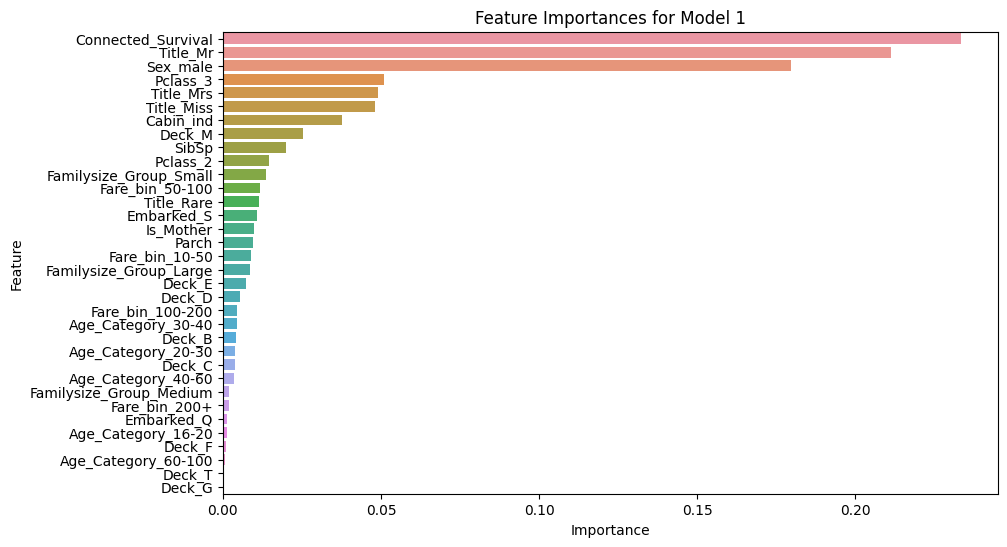

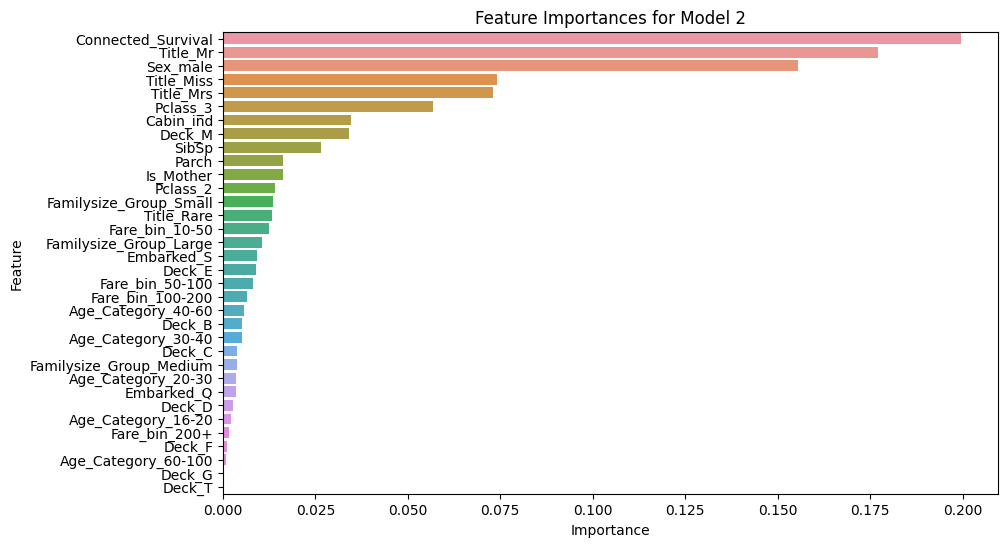

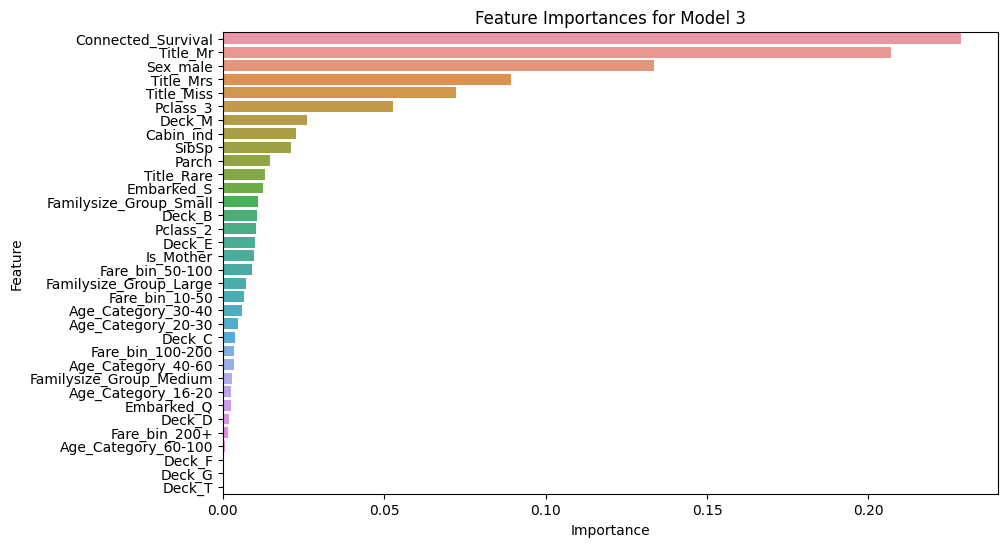

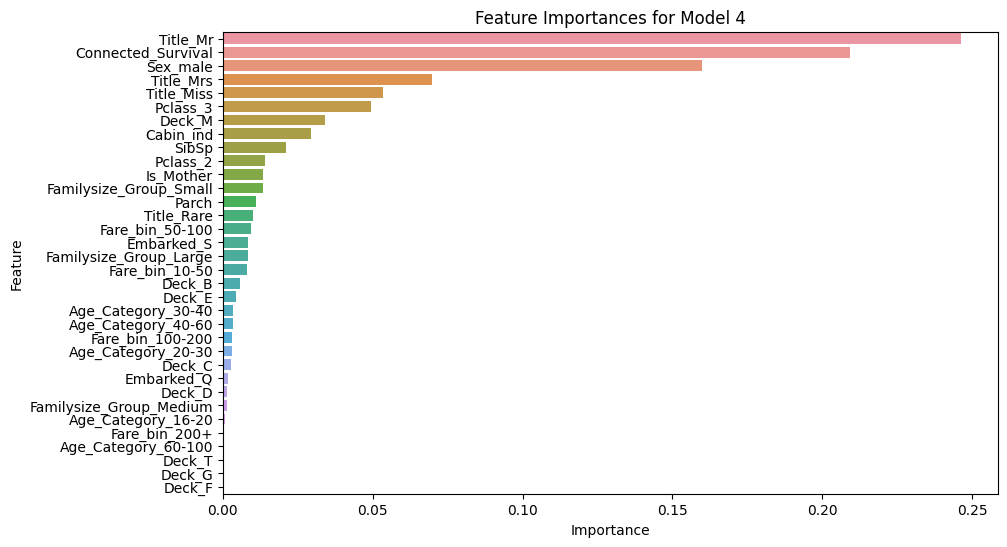

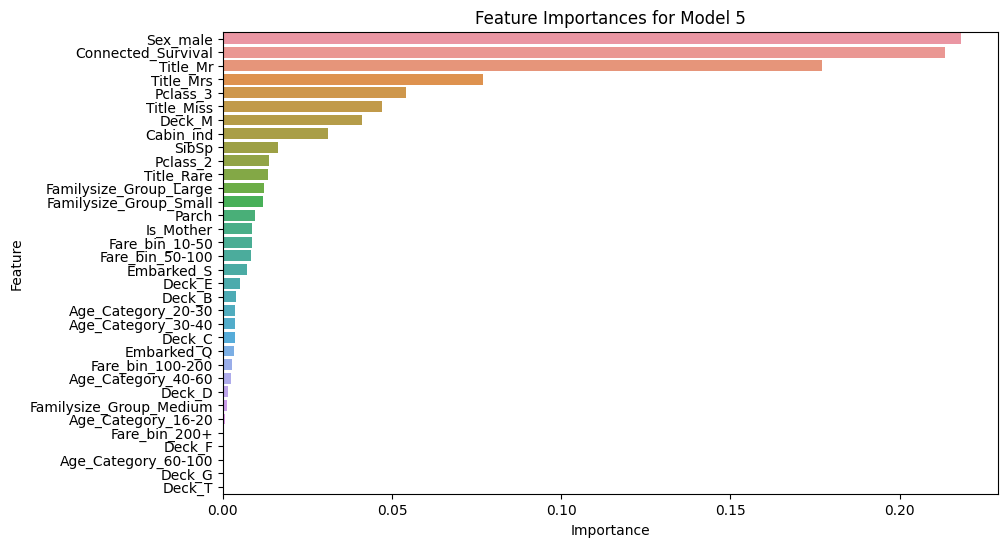

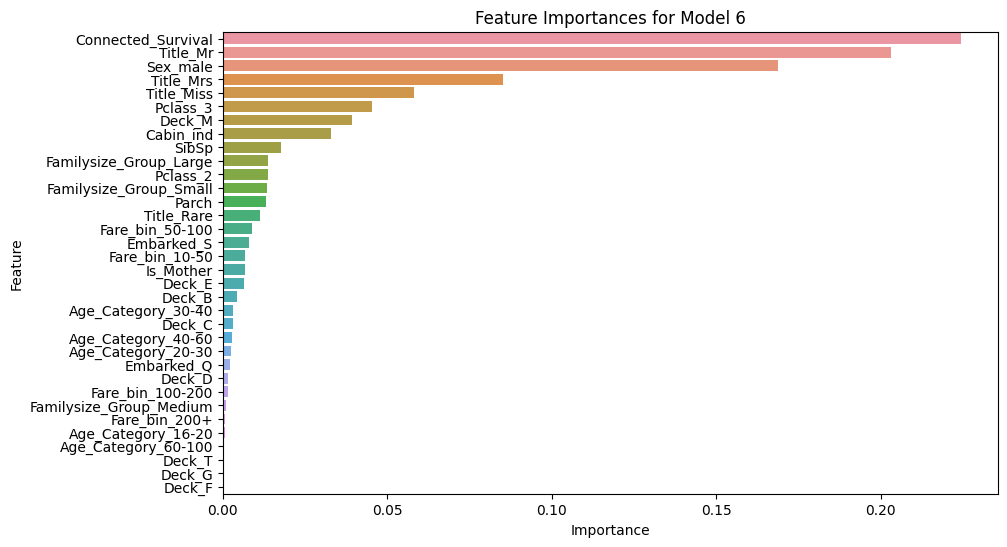

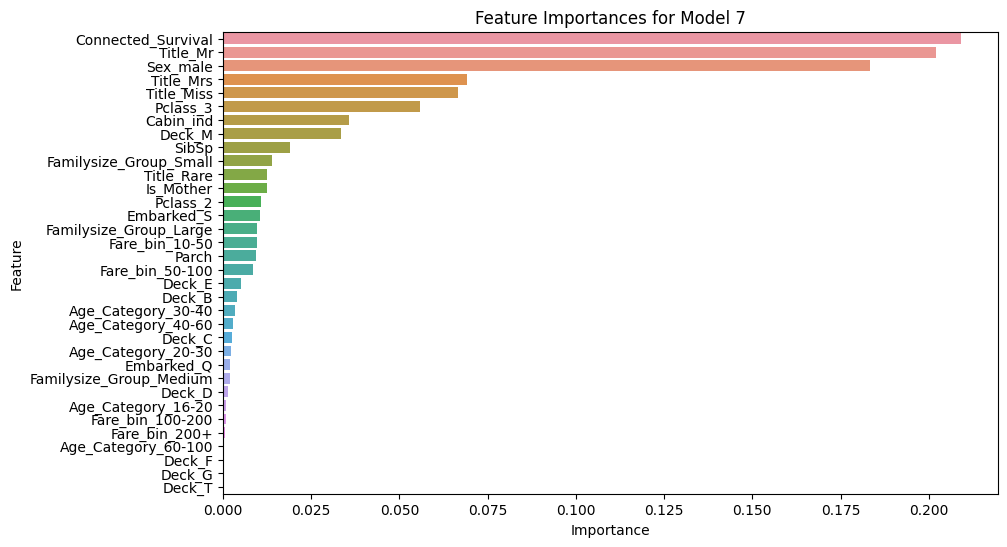

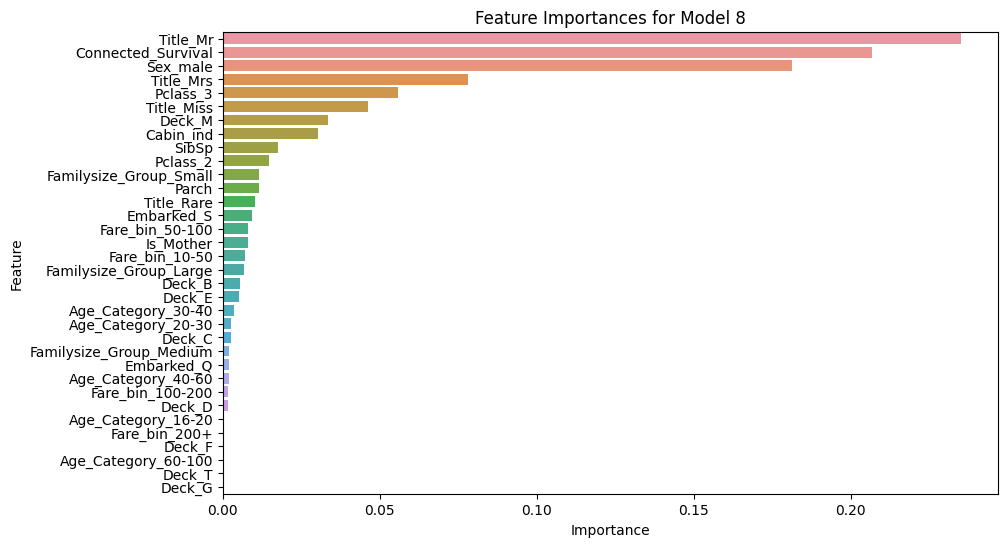

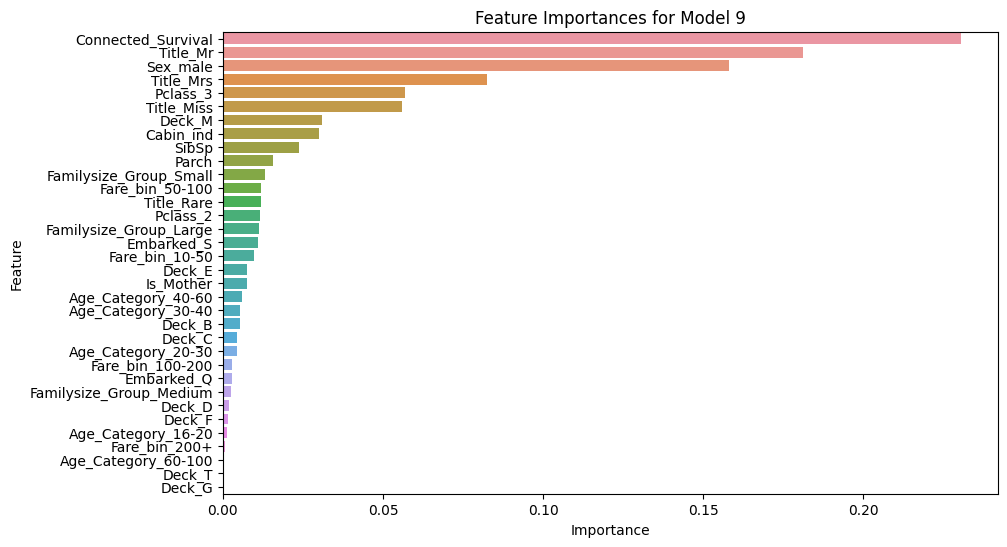

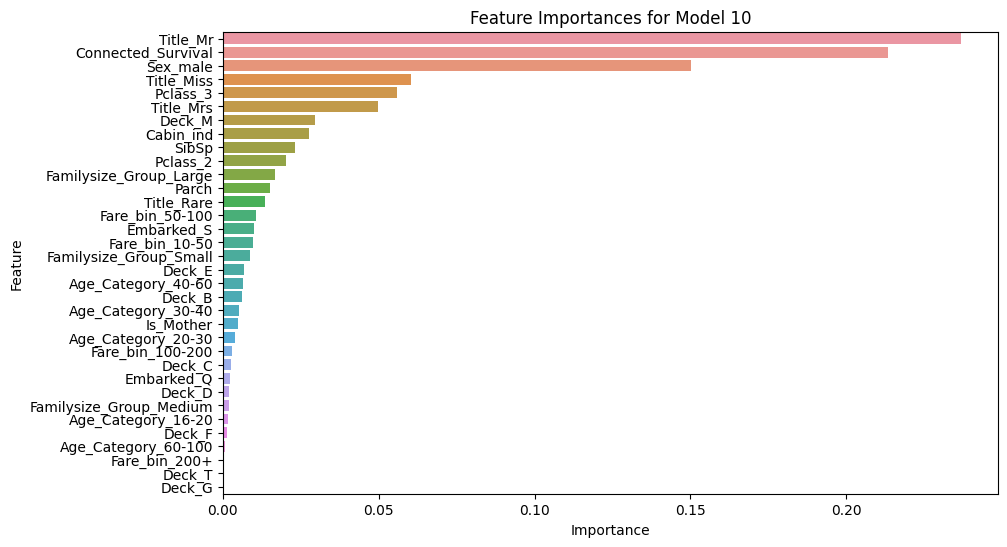

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Get feature names
feature_names = X_train_split.columns

# Plotting feature importances for each model
for i, model in enumerate(top_models):
    importances = model.feature_importances_
    importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': importances
    })
    importance_df = importance_df.sort_values(by='importance', ascending=False)
    
    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=importance_df)
    plt.title(f'Feature Importances for Model {i+1}')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()

In [125]:
from sklearn.ensemble import VotingClassifier

model_list = [(f'model_{i+1}', model) for i, model in enumerate(top_models)]
voting_clf = VotingClassifier(estimators=model_list, voting='soft')  
voting_clf.fit(X_train_split, y_train_split)


VotingClassifier(estimators=[('model_1',
                              RandomForestClassifier(max_depth=6,
                                                     max_features='log2',
                                                     min_samples_leaf=4,
                                                     n_estimators=75)),
                             ('model_2',
                              RandomForestClassifier(max_depth=6,
                                                     min_samples_leaf=4,
                                                     n_estimators=75)),
                             ('model_3',
                              RandomForestClassifier(max_depth=6,
                                                     min_samples_leaf=4,
                                                     min_samples_split=5,
                                                     n_estimators=75)),
                             ('model_4',
                              RandomForestClassifie...
                             ('model_8',
                              RandomForestClassifier(bootstrap=False,
                                                     max_depth=7,
                                                     min_samples_leaf=8,
                                                     n_estimators=125)),
                             ('model_9',
                              RandomForestClassifier(bootstrap=False,
                                                     max_depth=9,
                                                     min_samples_leaf=4,
                                                     min_samples_split=10,
                                                     n_estimators=125)),
                             ('model_10',
                              RandomForestClassifier(bootstrap=False,
                                                     max_depth=8,
                                                     min_samples_leaf=4,
                                                     min_samples_split=10,
                                                     n_estimators=50))],
                 voting='soft')

In [126]:
predictions = voting_clf.predict(X_test)

results = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': predictions
})

results.to_csv('prediction_voting02.csv', index=False)

In [673]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
import numpy as np

model_bags=top_models_base+top_models
print(model_bags)
def create_bagging_ensemble(models, X, y):
    for model in models:
        bagging_clf = BaggingClassifier(estimator=model, n_estimators=len(models), 
                                    bootstrap=True, n_jobs=-1, random_state=42)
        bagging_clf.fit(X, y)
    return bagging_clf

bagging_model = create_bagging_ensemble(model_bags, X_train_split, y_train_split)

y_pred = bagging_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)

print(f"Accuracy of Bagging Model: {accuracy:.4f}")


[XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=25, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...), XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric

In [674]:
Final_bagging_model = create_bagging_ensemble(model_bags, X_train, y_train)

In [675]:
predictions = Final_bagging_model .predict(X_test)

In [676]:
 results = pd.DataFrame({
     'PassengerId': test_data['PassengerId'],
     'Survived': predictions
    })

In [677]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('prediction26.csv', index=False)

In [678]:
for i in range(5):
    cv_scores = cross_val_score(top_models[i], X_train, y_train, cv=5, scoring='accuracy')

    # Print cross-validation scores
    print("Cross-validation Scores:")
    print(cv_scores)
    print(i)
    # Print mean and standard deviation of the cross-validation scores
    print(f"Mean Accuracy: {cv_scores.mean():.4f}")
    print(f"Standard Deviation: {cv_scores.std():.4f}")

Cross-validation Scores:
[0.90502793 0.85393258 0.88202247 0.8258427  0.89325843]
0
Mean Accuracy: 0.8720
Standard Deviation: 0.0286
Cross-validation Scores:
[0.90502793 0.84831461 0.88202247 0.8258427  0.89325843]
1
Mean Accuracy: 0.8709
Standard Deviation: 0.0294
Cross-validation Scores:
[0.90502793 0.86516854 0.85955056 0.8258427  0.88764045]
2
Mean Accuracy: 0.8686
Standard Deviation: 0.0269
Cross-validation Scores:
[0.90502793 0.85955056 0.85955056 0.83146067 0.88764045]
3
Mean Accuracy: 0.8686
Standard Deviation: 0.0254
Cross-validation Scores:
[0.89385475 0.86516854 0.87640449 0.8258427  0.88764045]
4
Mean Accuracy: 0.8698
Standard Deviation: 0.0241


In [328]:
final_model=top_models[3]

In [329]:
final_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [330]:
print(X_train.dtypes)
print(X_test.dtypes)

Age                        float64
SibSp                        int64
Parch                        int64
Fare                       float64
Age_Category_16-20           uint8
Age_Category_20-30           uint8
Age_Category_30-40           uint8
Age_Category_40-60           uint8
Age_Category_60-100          uint8
Fare_bin_10-50               uint8
Fare_bin_50-100              uint8
Fare_bin_100-200             uint8
Fare_bin_200+                uint8
Cabin_ind                    int64
Sex_male                     uint8
Embarked_Q                   uint8
Embarked_S                   uint8
Deck_B                       uint8
Deck_C                       uint8
Deck_D                       uint8
Deck_E                       uint8
Deck_F                       uint8
Deck_G                       uint8
Deck_M                       uint8
Deck_T                       uint8
Pclass_2                     uint8
Pclass_3                     uint8
Ticket_Survival_Rate       float64
Familysize_Group_Sma

In [334]:
results_df.sort_values(by='rank_test_score').head(5)

,mean_test_score,std_test_score,params,rank_test_score
936,0.984546,0.008203,"{'subsample': 0.8, 'reg_lambda': 0.03, 'n_esti...",1
1273,0.984546,0.008203,"{'subsample': 0.9, 'reg_lambda': 0.003, 'n_est...",1
1994,0.984546,0.008203,"{'subsample': 0.8, 'reg_lambda': 0.1, 'n_estim...",1
786,0.984546,0.008203,"{'subsample': 0.9, 'reg_lambda': 0, 'n_estimat...",1
948,0.984546,0.008203,"{'subsample': 0.9, 'reg_lambda': 0.01, 'n_esti...",1


In [335]:
top_5_params =results_df.sort_values(by='rank_test_score').head(5)['params'].tolist()

In [336]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

base_models = [
    (f'xgb_model_{i}', XGBClassifier(**params, random_state=102))
    for i, params in enumerate(top_5_params)
]

In [337]:
meta_model = LogisticRegression()

In [338]:
from sklearn.ensemble import StackingClassifier

stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

stacking_model.fit(X_train_split, y_train_split)

accuracy = stacking_model.score(X_val, y_val)

In [339]:
accuracy

1.0

In [340]:
stacking_model.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('xgb_model_0',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=0.7, device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=0.1,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=Non...
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=0.1, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=9,
                                              max_leaves=None,
                                              min_child_weight=3, missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=150, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=102, ...))],
                   final_estimator=LogisticRegression())

In [341]:
predictions = stacking_model.predict(X_test)

In [342]:
 results = pd.DataFrame({
     'PassengerId': test_data['PassengerId'],
     'Survived': predictions
    })

In [343]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      891 non-null    float64
 1   SibSp                    891 non-null    int64  
 2   Parch                    891 non-null    int64  
 3   Fare                     891 non-null    float64
 4   Age_Category_16-20       891 non-null    uint8  
 5   Age_Category_20-30       891 non-null    uint8  
 6   Age_Category_30-40       891 non-null    uint8  
 7   Age_Category_40-60       891 non-null    uint8  
 8   Age_Category_60-100      891 non-null    uint8  
 9   Fare_bin_10-50           891 non-null    uint8  
 10  Fare_bin_50-100          891 non-null    uint8  
 11  Fare_bin_100-200         891 non-null    uint8  
 12  Fare_bin_200+            891 non-null    uint8  
 13  Cabin_ind                891 non-null    int64  
 14  Sex_male                 8

In [344]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('prediction2.csv', index=False)

In [171]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [30, 40, 50, 75, 100, 200],
    'max_depth': [5, 6, 7, 8, 9, 10, 12, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None, 0.5, 0.7],
    'bootstrap': [True, False]
}

rf_model = RandomForestClassifier(random_state=102)

grid_search = GridSearchCV(estimator=rf_model, 
                           param_grid=param_grid, 
                           cv=5, 
                           n_jobs=-1, 
                           scoring='accuracy')

grid_search.fit(X_train_split, y_train_split)

print("Best parameters:", grid_search.best_params_)

RF_results = grid_search.cv_results_

results_df = pd.DataFrame({
    'mean_test_score': RF_results['mean_test_score'],
    'std_test_score': RF_results['std_test_score'],
    'params': RF_results['params'],
    'rank_test_score': RF_results['rank_test_score']
})

print(results_df.sort_values(by='rank_test_score'))

KeyboardInterrupt: 

In [98]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
rfe = RFE(model, n_features_to_select=40)
fit = rfe.fit(X_train, y_train)

selected_features = X_train.columns[fit.support_]
print("Selected features:", selected_features)

Selected features: Index(['Age', 'SibSp', 'Parch', 'Fare', 'Title_Master', 'Title_Miss',
       'Title_Mr', 'Title_Mrs', 'Age_Category_12-20', 'Age_Category_20-30',
       'Age_Category_30-40', 'Age_Category_40-50', 'Fare_bin_10-20',
       'Fare_bin_20-30', 'Fare_bin_30-40', 'Fare_bin_50-100', 'Cabin_ind',
       'Sex_male', 'Embarked_Q', 'Embarked_S', 'Deck_B', 'Deck_C', 'Deck_D',
       'Deck_E', 'Deck_M', 'Ticket_prefix_16', 'Ticket_prefix_19',
       'Ticket_prefix_24', 'Ticket_prefix_26', 'Ticket_prefix_31',
       'Ticket_prefix_34', 'Ticket_prefix_35', 'Ticket_prefix_36',
       'Ticket_prefix_38', 'Ticket_prefix_A/', 'Ticket_prefix_PC',
       'Ticket_prefix_ST', 'Pclass_2', 'Pclass_3', 'Alone'],
      dtype='object')


In [99]:
importances = model.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [100]:
final_model = RandomForestClassifier(
    bootstrap=False,
    max_depth=9,
    min_samples_leaf=2,
    min_samples_split=5,
    n_estimators=40,
    max_features='sqrt',
    random_state=102
)


In [101]:
final_model.fit(X_train_split, y_train_split)

RandomForestClassifier(bootstrap=False, max_depth=9, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=40, random_state=102)

In [102]:
y_pred = final_model.predict(X_val)

In [103]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = final_model.predict(X_val)
print("Accuracy on validation set:", accuracy_score(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))

Accuracy on validation set: 0.8435754189944135
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87       105
           1       0.83      0.78      0.81        74

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.84       179
weighted avg       0.84      0.84      0.84       179

Confusion Matrix:
 [[93 12]
 [16 58]]


In [104]:
final_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=9, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=40, random_state=102)

In [105]:
predictions = final_model.predict(X_test)

In [107]:
 results = pd.DataFrame({
     'PassengerId': test_data['PassengerId'],
     'Survived': predictions
    })
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('prediction7.csv', index=False)

,PassengerId,Survived
count,418.000000,418.000000
mean,1100.500000,0.327751
std,120.810458,0.469956
min,892.000000,0.000000
25%,996.250000,0.000000
50%,1100.500000,0.000000
75%,1204.750000,1.000000
max,1309.000000,1.000000


,PassengerId,Survived
count,418.000000,418.000000
mean,1100.500000,0.322967
std,120.810458,0.468170
min,892.000000,0.000000
25%,996.250000,0.000000
50%,1100.500000,0.000000
75%,1204.750000,1.000000
max,1309.000000,1.000000
